# Import Packages

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import math

from ydata_profiling import ProfileReport #For EDA 

from sklearn.impute import SimpleImputer #For simple imputations
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


# Loading the Dataset

In [64]:
# Writing a function that loads the dataset
def load_data():
    data = pd.read_csv('diabetes_data.csv')
    return data

In [65]:
df = load_data()

# Exploratory Data Analysis

## Running EDA using ydata-profiling

You will find a file called **df_profile.html** where you can find a comprehensive exploratory data analysis summary of df

Look at the **'missing values'** section on the top right of the report to get an idea of what variables have missing values and what their proportions are.

In [20]:
# Visualizing the data using ydata_profiling
pr_df = ProfileReport(df)

# show pr_df
pr_df.to_file("df_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Imputing missing variables: Insulin

For this exercise, we'll just focus on the Insulin variable and explore the following different imputation methods:

1. Simple Imputation:
    1. Mean
    2. Median
2. Advanced Imputation:
    1. KNN

In [68]:
df_simple_impute = df.copy()

### 1. Simple Imputing: mean and median imputation

Let's impute the insulin variable using mean and median simple imputation techniques and analyze our work

In [69]:
# Creating a couple of SimpleImputer objects with mean and median strategies
mean_imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
median_imputer = SimpleImputer(missing_values = np.nan, strategy='median')

In [70]:
# Creating Insulin imputed with both the mean and the median
df_simple_impute['Insulin_mean'] = mean_imputer.fit_transform(df_simple_impute['Insulin'].values.reshape(-1,1))
df_simple_impute['Insulin_median'] = median_imputer.fit_transform(df_simple_impute['Insulin'].values.reshape(-1,1))

#### 1.1 A scatter plot to visualize our two imputation techniques 

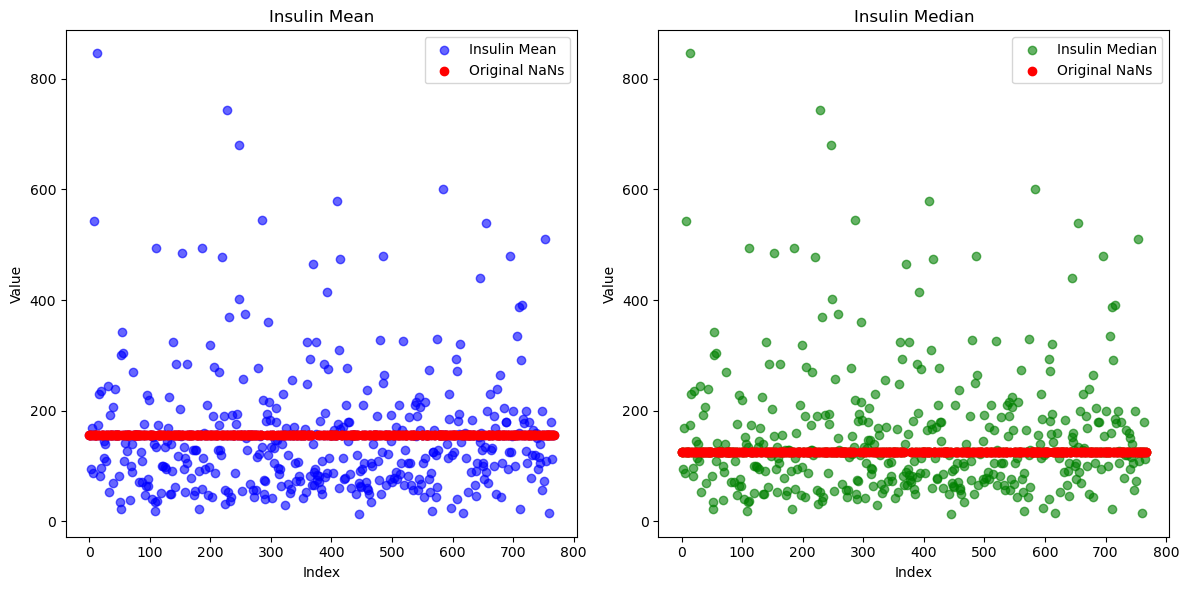

In [71]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Find indexes of rows where 'Insulin' is NaN
nan_indices = df_simple_impute[df_simple_impute['Insulin'].isna()].index

# Plotting 'Insulin_mean' as a scatter plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(df_simple_impute.index, df_simple_impute['Insulin_mean'], color='blue', label='Insulin Mean', alpha=0.6)  # Main data
plt.scatter(nan_indices, df_simple_impute.loc[nan_indices, 'Insulin_mean'], color='red', label='Original NaNs')  # Highlight NaNs
plt.title('Insulin Mean')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Plotting 'Insulin_median' as a scatter plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(df_simple_impute.index, df_simple_impute['Insulin_median'], color='green', label='Insulin Median', alpha=0.6)  # Main data
plt.scatter(nan_indices, df_simple_impute.loc[nan_indices, 'Insulin_median'], color='red', label='Original NaNs')  # Highlight NaNs
plt.title('Insulin Median')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


The observations highlighted in red represent the data points that were initially missing (NAs) prior to imputation. Following the imputation process, these values have been replaced with either the mean or the median of the observations that were not missing.

#### 1.2 A histogram to visualize the distribution of Insulin using our two different techniques

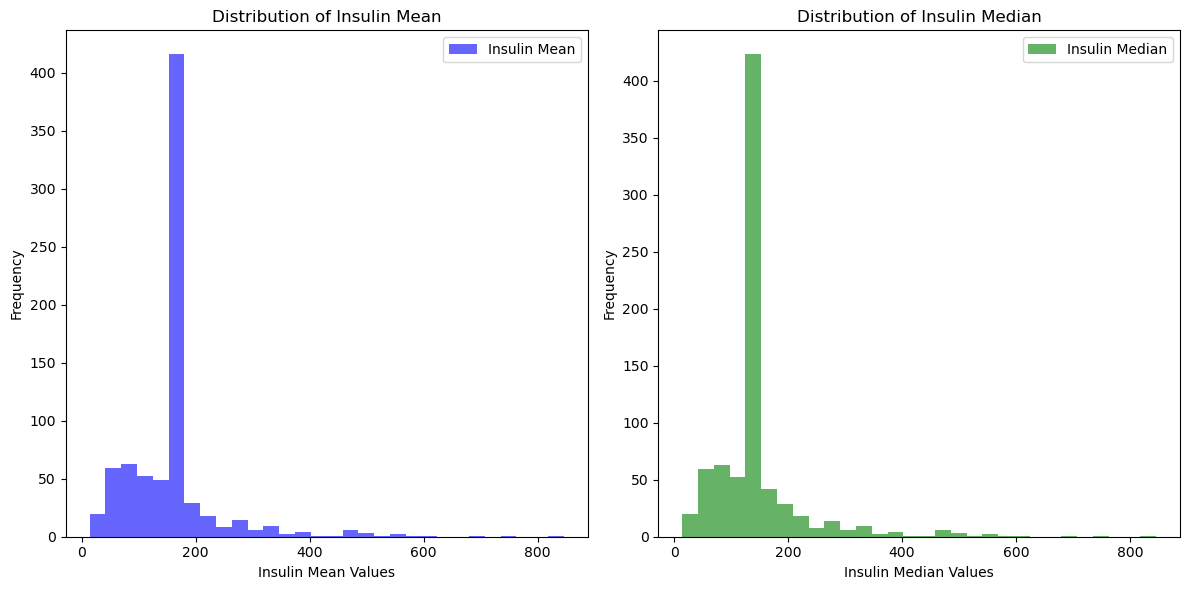

In [72]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plotting distribution of 'Insulin_mean'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df_simple_impute['Insulin_mean'], color='blue', label='Insulin Mean', alpha=0.6, bins=30)  # Histogram for Insulin_mean
plt.title('Distribution of Insulin Mean')
plt.xlabel('Insulin Mean Values')
plt.ylabel('Frequency')
plt.legend()

# Plotting distribution of 'Insulin_median'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df_simple_impute['Insulin_median'], color='green', label='Insulin Median', alpha=0.6, bins=30)  # Histogram for Insulin_median
plt.title('Distribution of Insulin Median')
plt.xlabel('Insulin Median Values')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**Bias in Imputation:** 
Any imputation method involves making assumptions about the missing data. For simple imputation methods such as mean or median imputation, these methods assume that the missing data are similar or representative of the non-missing data. However, if the missing data have a different pattern or distribution, the imputation can introduce biases. This means the summary statistics, relationships, or patterns in the imputed data might not accurately reflect the true nature of the original complete data.



**Underestimation Issue:** 
The standard error tells us how much we can expect our survey or study results to differ from the real value we're trying to estimate—like the average height of all people in a city.

Now, imagine we're missing some of the height measurements, so we decide to fill in the blanks with the average height of everyone we did measure. This seems like a quick fix, but there's a catch: those made-up numbers don't have the natural variety that real measurements would have. Everyone's height is a little different, after all.

When we pretend these "fill-in" numbers are real, we trick ourselves into thinking our results are more consistent than they actually are. This makes our standard error look smaller, which is a problem. It's like saying we're really confident about the average height we calculated, but that confidence is based on some faked data. So, if we're not careful, we might end up too sure of our findings, thinking there's a meaningful pattern or difference when there might not be one.

### 2. Advanced imputation: KNN imputation

In [73]:
df_knn = df.copy()

The default number of k is (k=5), but it is commonly suggested that the optimal k value is the square root of the number of observations in the dataset

In [74]:
k = math.ceil(math.sqrt(len(df)))
k

28

In [75]:
# Define scaler to set values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=k, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

# Converting the dataset to its original form after scaling 
original_data = scaler.inverse_transform(df_knn_imputed)

# Convert the original data to a DataFrame
df_original = pd.DataFrame(original_data, columns=df_knn.columns)

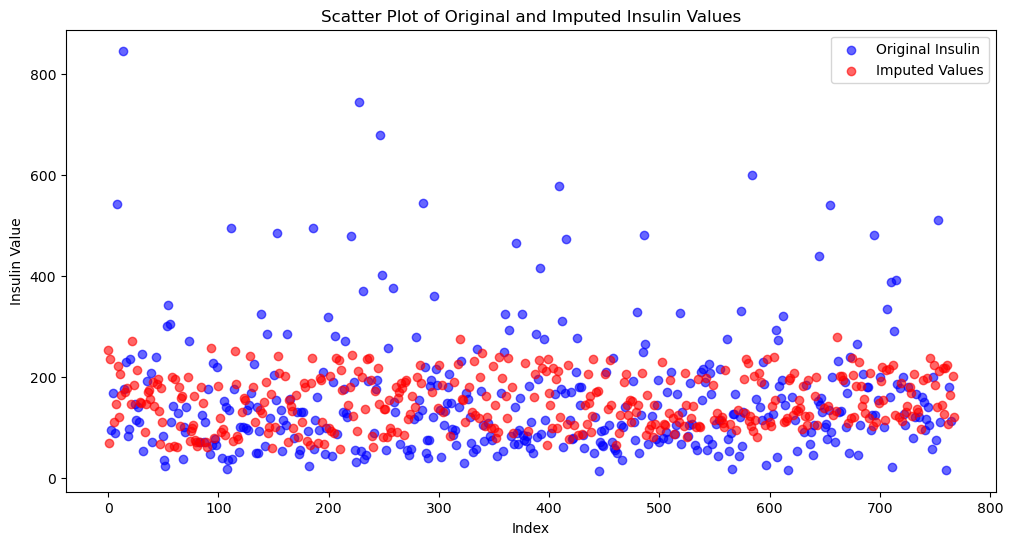

In [87]:
# Find the indices where 'Insulin' was originally NaN
nan_indices = df['Insulin'].isna()

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plotting original non-NaN 'Insulin' values from 'df' as a scatter plot
# Only plot points that were not NaN in the original dataset
plt.scatter(df.index[~nan_indices], df['Insulin'][~nan_indices], color='blue', label='Original Insulin', alpha=0.6)

# Overlaying the imputed values from 'df_original' on the same plot in red
# Only plot points that were NaN in the original dataset
plt.scatter(df.index[nan_indices], df_original['Insulin'][nan_indices], color='red', label='Imputed Values', alpha=0.6)

plt.title('Scatter Plot of Original and Imputed Insulin Values')
plt.xlabel('Index')
plt.ylabel('Insulin Value')
plt.legend()
plt.show()


The observations highlighted in red represent the data points that were initially missing (NAs) prior to imputation. Following the imputation process, these values have been replaced with the value of their k nearest neigbhors. Look how their values look much more natural and how much variability they now have.

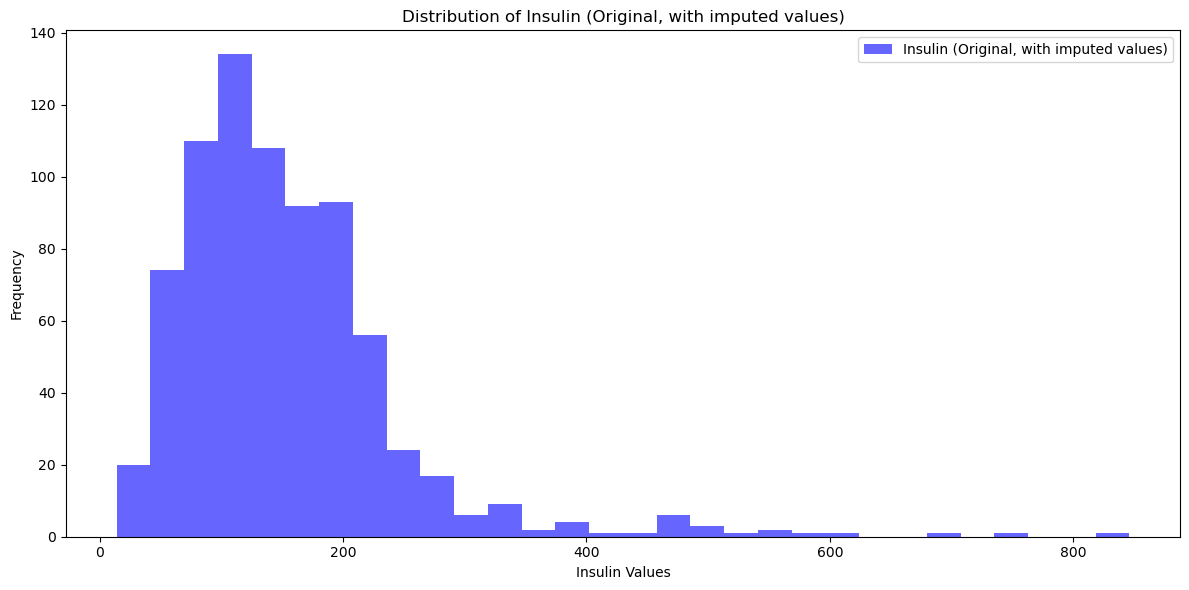

In [89]:
# Now let's plot the distribution of 'Insulin' from df_original
plt.figure(figsize=(12, 6))

# Plotting distribution of 'Insulin' from df_original
plt.hist(df_original['Insulin'], color='blue', label='Insulin (Original, with imputed values)', alpha=0.6, bins=30)
plt.title('Distribution of Insulin (Original, with imputed values)')
plt.xlabel('Insulin Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

Compare the visualiations between KNN imputation and simple imputation

# Summary

K-nearest neighbors (KNN) imputation is an alternative to simple imputation that can sometimes provide better results because it's more sophisticated. Instead of just filling missing values with the overall mean or median, KNN imputation looks for a set of observations that are similar (the nearest neighbors) to the one with the missing data and estimates the missing value based on the values of those neighbors.

**Here's how KNN imputation can potentially make things better compared to simple imputation:**

Reflects Data Variability: Because KNN uses actual data points that are similar to the missing data point, it better captures the natural variability of the data. This can lead to a more accurate standard error because the imputed values are not all the same (like they would be with mean or median imputation).

More Informed Estimates: KNN takes into account the pattern of the data, finding the most similar cases to estimate the missing value. This can give a more informed and thus potentially more accurate fill-in for the missing data.

Reduces Bias: By preserving the data's structure and variation, KNN imputation can reduce the bias that simple imputation might introduce.

However, KNN imputation isn't perfect and doesn't solve all problems:

- It can be computationally expensive, especially with large datasets, because it requires calculating the distances between observations.
- It assumes that your data has a meaningful structure and that similar observations can be found. If your data is very random or the missingness is not random, KNN might not work well.
- It still introduces uncertainty, and while it may lead to a better estimate of standard errors than simple imputation, it doesn't fully resolve the issue of underestimation.
    
So, while KNN imputation can be an improvement over simple imputation, it is important to understand its assumptions and limitations. It often provides more realistic imputations which can lead to more reliable statistical analyses, but like any imputation method, it cannot fully recover the information that would have been contained in the original, complete data.